In [1]:
#directory "_build"
#load "matrix.cmo"
#require "jupyter-archimedes"
#use "matrix.ml"
#use "perceptron.ml"

/home/kalagar/.opam/cs3110-finalproj/lib/ocaml/unix.cma: loaded
/home/kalagar/.opam/cs3110-finalproj/lib/ocaml/bigarray.cma: loaded
/home/kalagar/.opam/cs3110-finalproj/lib/cairo2: added to search path
/home/kalagar/.opam/cs3110-finalproj/lib/cairo2/cairo.cma: loaded
/home/kalagar/.opam/cs3110-finalproj/lib/ocaml/dynlink.cma: loaded
/home/kalagar/.opam/cs3110-finalproj/lib/ocaml/camlp4: added to search path
/home/kalagar/.opam/cs3110-finalproj/lib/archimedes: added to search path
/home/kalagar/.opam/cs3110-finalproj/lib/archimedes/archimedes_internals.cma: loaded
/home/kalagar/.opam/cs3110-finalproj/lib/archimedes/archimedes_toploop.cma: loaded


Cannot find file graphics.cma.
Cannot find file archimedes_graphics.cma.


Module Archimedes loaded and aliased as A.
/home/kalagar/.opam/cs3110-finalproj/lib/archimedes/archimedes_cairo.cma: loaded
/home/kalagar/.opam/cs3110-finalproj/lib/bytes: added to search path
/home/kalagar/.opam/cs3110-finalproj/lib/base64: added to search path
/home/kalagar/.opam/cs3110-finalproj/lib/base64/base64.cma: loaded
/home/kalagar/.opam/cs3110-finalproj/lib/ocaml/compiler-libs: added to search path
/home/kalagar/.opam/cs3110-finalproj/lib/ocaml/compiler-libs/ocamlcommon.cma: loaded
/home/kalagar/.opam/cs3110-finalproj/lib/result: added to search path
/home/kalagar/.opam/cs3110-finalproj/lib/result/result.cma: loaded
/home/kalagar/.opam/cs3110-finalproj/lib/ppx_deriving/runtime: added to search path
/home/kalagar/.opam/cs3110-finalproj/lib/ppx_deriving/runtime/ppx_deriving_runtime.cma: loaded
/home/kalagar/.opam/cs3110-finalproj/lib/ppx_deriving_yojson/runtime: added to search path
/home/kalagar/.opam/cs3110-finalproj/lib/ppx_deriving_yojson/runtime/ppx_deriving_yojson_runtim

type t = { dimensions : int * int; matrix : float list list; }
exception InvalidDimensions of string
val dim : t -> int * int = <fun>
val matrix : t -> float list list = <fun>
val fill : int -> int -> float -> t = <fun>
val zero : int -> int -> t = <fun>
val eye : int -> t = <fun>
val transpose : t -> t = <fun>
val mult : t -> t -> t = <fun>
val to_array : 'a list list -> 'a array array = <fun>
val to_list : 'a array array -> 'a list list = <fun>
val swap : 'a array -> int -> int -> unit = <fun>
val rref : t -> t = <fun>
val construct : float list list -> t = <fun>
val lu_decomp : t -> t * t = <fun>
val concat : t -> t -> t = <fun>
val invert : t -> t = <fun>
val scale : t -> float -> t = <fun>
val det : t -> float = <fun>
val magnitude : t -> float = <fun>
val normalize : t -> t = <fun>
val eigen : t -> bool -> float * t = <fun>
val elem_pow : t -> float -> t = <fun>
val pinv : t -> t = <fun>
val op : t -> t -> (float -> float -> float) -> t = <fun>
val dot : t -> t -> float = <fun>
v

In [2]:
(*Generate points*)
let rec gen_x acc n = if n = 0 then acc else gen_x ((1.0 -. Random.float 2.0) :: acc) (n-1) 
let x = gen_x [] 100
let y = gen_x [] 100 
let f x y = if y > 0.8 *. x +. 0.4 then 1.0 else 0.0
let rec gen_pp x_acc y_acc u_acc l_acc = 
    match x_acc with 
    | [] -> (u_acc, l_acc)
    | x :: xs -> 
        match y_acc with 
            | [] -> assert false
            | y :: ys -> if f x y = 1.0 then gen_pp xs ys (u_acc @ [(x, y)]) l_acc 
                         else gen_pp xs ys u_acc (l_acc @ [(x, y)])
let pp = gen_pp x y [] []
let u_pp = fst pp 
let l_pp = snd pp
let rec gen_labels x_acc y_acc l_acc = 
    match x_acc with 
    | [] -> l_acc
    | x :: xs -> 
        match y_acc with 
            | [] -> assert false
            | y :: ys -> gen_labels xs ys (l_acc @ [f x y])
let labels = [gen_labels x y []] |> construct |> transpose 
let x = [x] |> construct |> transpose 
let y = [y] |> construct |> transpose 
let data = concat x y 
let w = train data 0.001 labels |> matrix 
let f' x = let [w0 :: w1 :: [w2]] = w in (-1.) *. (w1 *. x +. w0) /. w2

val gen_x : float list -> int -> float list = <fun>


val x : float list =
  [-0.987784595469628268; -0.489905336965362537; -0.352604062839214416;
   0.0173777388624515305; 0.00499562489414362432; -0.104478011317730379;
   0.791493012817419; 0.269814172621075543; -0.333522215857828819;
   0.728501042862963244; 0.732674502192866894; 0.868223619777464;
   0.782297003066752761; -0.503393821968151078; -0.0605919413435303;
   -0.412568137859626427; -0.791872204780667888; 0.157749898044766246;
   0.612974931625427599; 0.17574113528771873; -0.370390135820079847;
   -0.106938754707225359; -0.620362308135317564; -0.769548849473776109;
   0.808060296490082375; 0.845621667123675591; 0.675024501598670224;
   0.0703462091105935272; -0.466788489328519907; -0.258273045173851301;
   -0.195763640229016822; 0.847423238539444; -0.24375224586335742;
   -0.333253686011659278; -0.113806819964312078; 0.620753329207703097;
   0.792232816175799104; -0.296041352244673206; -0.292163515205516866;
   -0.930609540175271421; -0.550582775426641469; -0.33214068454279233;

val y : float list =
  [-0.356394598965148246; -0.945920000853645249; -0.552884300955627239;
   -0.825434722037959867; 0.175658477102693666; 0.188941695258800446;
   -0.990908309360407191; -0.673293292468106319; 0.778843062493142169;
   0.0741795816379163808; -0.159855696130537517; -0.515376900227066059;
   -0.415367831702535772; -0.437681096543790504; 0.0932030322944296108;
   -0.0263927886371080334; -0.212762232826815723; -0.43514514463115872;
   0.373057180937793276; -0.770559430452002259; -0.0472746184799310853;
   0.585747012696682168; 0.465719646375665208; -0.114552243745221105;
   -0.166615824422504; -0.555417679373549245; 0.920603422232418422;
   -0.043776868232283439; -0.543824564658237808; -0.639529569309093215;
   -0.142117304487041185; 0.73658751838802583; -0.347416840247356529;
   -0.0889104286268305177; 0.0248804667542362745; 0.172882432975926759;
   0.697748204969673; -0.153129070091483799; 0.339403501447424261;
   -0.853499011202369; -0.699381207530888727; -0.2937200950

val f : float -> float -> float = <fun>


val gen_pp :
  float list ->
  float list ->
  (float * float) list ->
  (float * float) list -> (float * float) list * (float * float) list = <fun>


val pp : (float * float) list * (float * float) list =
  ([(-0.987784595469628268, -0.356394598965148246);
    (-0.333522215857828819, 0.778843062493142169);
    (-0.791872204780667888, -0.212762232826815723);
    (-0.106938754707225359, 0.585747012696682168);
    (-0.620362308135317564, 0.465719646375665208);
    (-0.769548849473776109, -0.114552243745221105);
    (-0.292163515205516866, 0.339403501447424261);
    (-0.40434496636888273, 0.787906327452000288);
    (-0.73643118364004323, -0.10843634188661766);
    (-0.819293061439132275, 0.226706576802660043);
    (-0.396563045568195216, 0.161318097799569515);
    (-0.986613301233826068, -0.271789943575172721);
    (-0.21066046271624117, 0.960213472767202703);
    (-0.685582842599424147, 0.0564088380159690761);
    (-0.132565346258922689, 0.820164629217935426);
    (-0.736410130077171932, 0.987933941097710266);
    (-0.88811829857407143, 0.940242052680046791);
    (-0.234926040228939481, 0.384869729505701419);
    (-0.280843789413911082

val u_pp : (float * float) list =
  [(-0.987784595469628268, -0.356394598965148246);
   (-0.333522215857828819, 0.778843062493142169);
   (-0.791872204780667888, -0.212762232826815723);
   (-0.106938754707225359, 0.585747012696682168);
   (-0.620362308135317564, 0.465719646375665208);
   (-0.769548849473776109, -0.114552243745221105);
   (-0.292163515205516866, 0.339403501447424261);
   (-0.40434496636888273, 0.787906327452000288);
   (-0.73643118364004323, -0.10843634188661766);
   (-0.819293061439132275, 0.226706576802660043);
   (-0.396563045568195216, 0.161318097799569515);
   (-0.986613301233826068, -0.271789943575172721);
   (-0.21066046271624117, 0.960213472767202703);
   (-0.685582842599424147, 0.0564088380159690761);
   (-0.132565346258922689, 0.820164629217935426);
   (-0.736410130077171932, 0.987933941097710266);
   (-0.88811829857407143, 0.940242052680046791);
   (-0.234926040228939481, 0.384869729505701419);
   (-0.280843789413911082, 0.954462675712869135);
   (0.094078775

val l_pp : (float * float) list =
  [(-0.489905336965362537, -0.945920000853645249);
   (-0.352604062839214416, -0.552884300955627239);
   (0.0173777388624515305, -0.825434722037959867);
   (0.00499562489414362432, 0.175658477102693666);
   (-0.104478011317730379, 0.188941695258800446);
   (0.791493012817419, -0.990908309360407191);
   (0.269814172621075543, -0.673293292468106319);
   (0.728501042862963244, 0.0741795816379163808);
   (0.732674502192866894, -0.159855696130537517);
   (0.868223619777464, -0.515376900227066059);
   (0.782297003066752761, -0.415367831702535772);
   (-0.503393821968151078, -0.437681096543790504);
   (-0.0605919413435303, 0.0932030322944296108);
   (-0.412568137859626427, -0.0263927886371080334);
   (0.157749898044766246, -0.43514514463115872);
   (0.612974931625427599, 0.373057180937793276);
   (0.17574113528771873, -0.770559430452002259);
   (-0.370390135820079847, -0.0472746184799310853);
   (0.808060296490082375, -0.166615824422504);
   (0.84562166712367

val gen_labels : float list -> float list -> float list -> float list = <fun>


val labels : Matrix.t = <abstr>


val x : Matrix.t = <abstr>


val y : Matrix.t = <abstr>


val data : Matrix.t = <abstr>


val w : float list list =
  [[-0.0170669965092647702; -0.0353983977873820535; 0.0432718809324131384]]


File "[2]", line 28, characters 11-71:
28 | let f' x = let [w0 :: w1 :: [w2]] = w in (-1.) *. (w1 *. x +. w0) /. w2
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Warning 8: this pattern-matching is not exhaustive.
Here is an example of a case that is not matched:
((_::_::_::[])::_::_|(_::_::_::_::_)::_|(_::_::[])::_|(_::[])::_|[]::_|[])


val f' : float -> float = <fun>


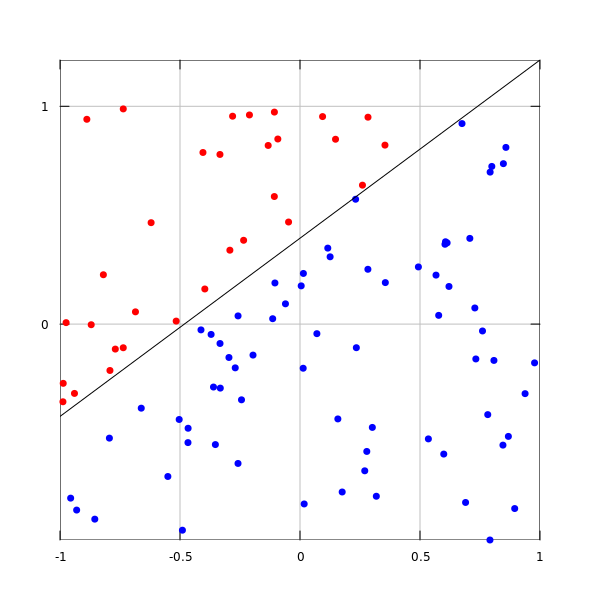

- : unit = ()


In [3]:
(* Plot using Archimedes *)
let vp = A. init ~w:600. ~h:600. ["jupyter"] in
    A.Axes.box vp ;
    A.set_color vp A.Color.red ;
    A.List.xy_pairs vp u_pp ;
    A.set_color vp A.Color.blue ;
    A.List.xy_pairs vp l_pp ;
    A.set_color vp A.Color.black ;
    A.fx vp f' (-1.0) 1.0 ;
    A.close vp 